K-Means Inertia: 191.02473685317972
K-Means Silhouette Score: 0.480
DBSCAN Silhouette Score: 0.5979413783542474


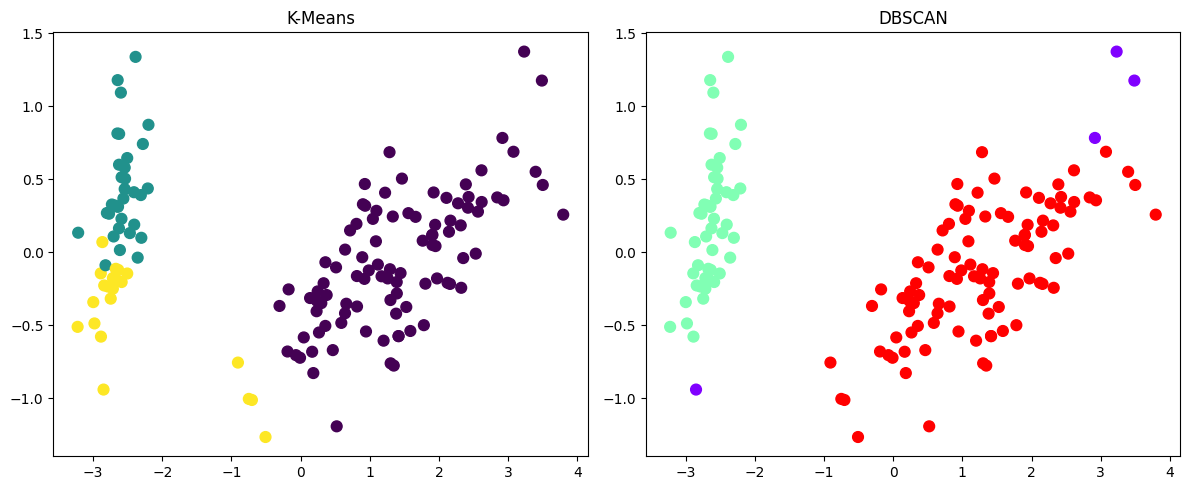

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Labels (for evaluation purpose, though not used in clustering)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
kmeans_labels = kmeans.labels_
kmeans_centroids = kmeans.cluster_centers_
kmeans_inertia = kmeans.inertia_
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)

print(f"K-Means Inertia: {kmeans_inertia}")
print(f"K-Means Silhouette Score: {kmeans_silhouette:.3f}")

# Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.8, min_samples=5)  # Tune eps and min_samples if needed
dbscan_labels = dbscan.fit_predict(X_scaled)

# Filter noise points (-1) before calculating silhouette score
if len(set(dbscan_labels)) > 1 and -1 in dbscan_labels:
    filtered_labels = dbscan_labels[dbscan_labels != -1]
    filtered_data = X_scaled[dbscan_labels != -1]
    dbscan_silhouette = silhouette_score(filtered_data, filtered_labels)
else:
    dbscan_silhouette = "Not applicable (all data clustered as noise or single cluster)"

print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")

# PCA for visualization
pca = PCA(n_components=2)
X_pca = PCA(n_components=2).fit_transform(X)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=60)
plt.title("K-Means")

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='rainbow', s=60)
plt.title("DBSCAN")

plt.tight_layout()
plt.show()


